In [2]:
# imports
import numpy as np
import pandas as pd

## Dataset Information

### 1. go_track_tracks.csv: 
> a list of trajectories

- id_android - it represents the device used to capture the instance;
- speed - it represents the average speed (Km/H)
- distance - it represent the total distance (Km)
- rating - it is an evaluation parameter. Evaluation the traffic is a way to verify the volunteers perception about the traffic during the travel, in other words,
- if volunteers move to  some place and face traffic jam, maybe they will evaluate 'bad'. 
    
    3 - good,
    
    2 - normal,
    
    1 - bad.

- rating_bus - it is other evaluation parameter. 

    1 - The amount of people inside the bus is little, 

    2 - The bus is not crowded, 
    
    3 - The bus is crowded.

- rating_weather - it is another evaluation parameter. 

    1 - raining.
    
    2 - sunny, 

- car_or_bus 

    1 - car,
    
    2 - bus

- linha - information about the bus that does the pathway

### 2. go_track_trackspoints.csv: 
> localization points of each trajectory

- id: unique key to identify each point
- latitude: latitude from where the point is
- longitude: longitude from where the point is
- track_id: identify the trajectory which the point belong
- hour: datehour when the point was collected (GMT-3)

In [3]:
# load data
tracks_filepath = "../data/go_track_tracks.csv"
tracks_points_filepath = "../data/go_track_trackspoints.csv"

tracks_df = pd.read_csv(tracks_filepath)
tracks_points_df = pd.read_csv(tracks_points_filepath)

tracks_df.shape, tracks_points_df.shape

((163, 10), (18107, 5))

In [4]:
tracks_df.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [5]:
tracks_points_df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [6]:
# Data Summary/description
tracks_df.describe()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,15607.650307,7.386503,16.704738,0.264272,5.302411,2.515337,0.386503,0.515337,1.466258
std,18644.257138,7.348742,16.016168,0.292731,7.639011,0.679105,0.687859,0.841485,0.500397
min,1.000000,0.000000,0.009779,0.002175,0.001000,1.000000,0.000000,0.000000,1.000000
25%,48.500000,1.000000,1.591016,0.035978,0.034500,2.000000,0.000000,0.000000,1.000000
50%,158.000000,4.000000,16.685368,0.214466,3.995000,3.000000,0.000000,0.000000,1.000000
75%,37991.000000,10.000000,23.915760,0.390572,7.333000,3.000000,1.000000,1.000000,2.000000
max,38092.000000,27.000000,96.206029,1.942948,55.770000,3.000000,3.000000,2.000000,2.000000


In [7]:
# Data Summary/description
tracks_points_df.describe()

,id,latitude,longitude,track_id
count,18107.000000,18107.000000,18107.000000,18107.000000
mean,9958.405920,-10.998744,-37.111923,13296.340697
std,5748.673657,1.329848,0.938015,18040.767448
min,1.000000,-27.603175,-48.632918,1.000000
25%,4736.500000,-10.944041,-37.073069,33.000000
50%,10376.000000,-10.922000,-37.057784,136.000000
75%,15004.500000,-10.904268,-37.050190,37992.000000
max,19569.000000,-10.292845,-36.493357,38092.000000


In [8]:
# Preprocessing

## Drop columns
tracks_clean = tracks_df.drop(columns=["id_android", "linha"])

# tracks_points_clean = tracks_points_df.drop(columns=["id"])
tracks_points_clean = tracks_points_df

## Drop rows with missing values
tracks_clean = tracks_clean.dropna()

tracks_points_df = tracks_points_clean.dropna()

tracks_clean.shape, tracks_points_df.shape

((163, 8), (18107, 5))

<Axes: >

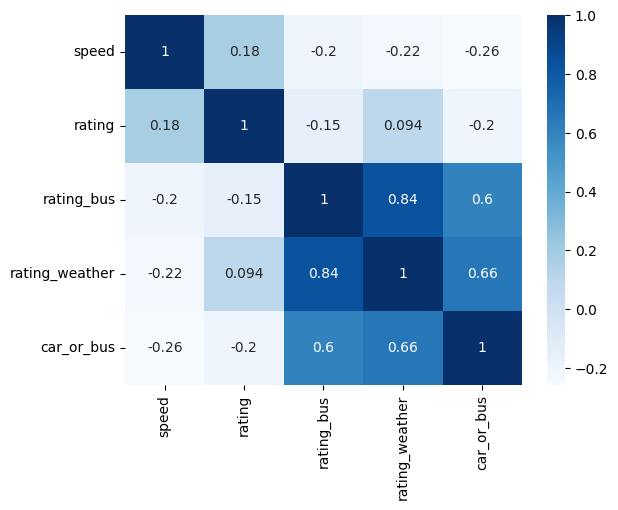

In [19]:
# Coorelaation
import seaborn as sns

sns.heatmap(tracks_clean[["speed", "rating", "rating_bus", "rating_weather", "car_or_bus"]].corr(), annot=True, cmap='Blues')

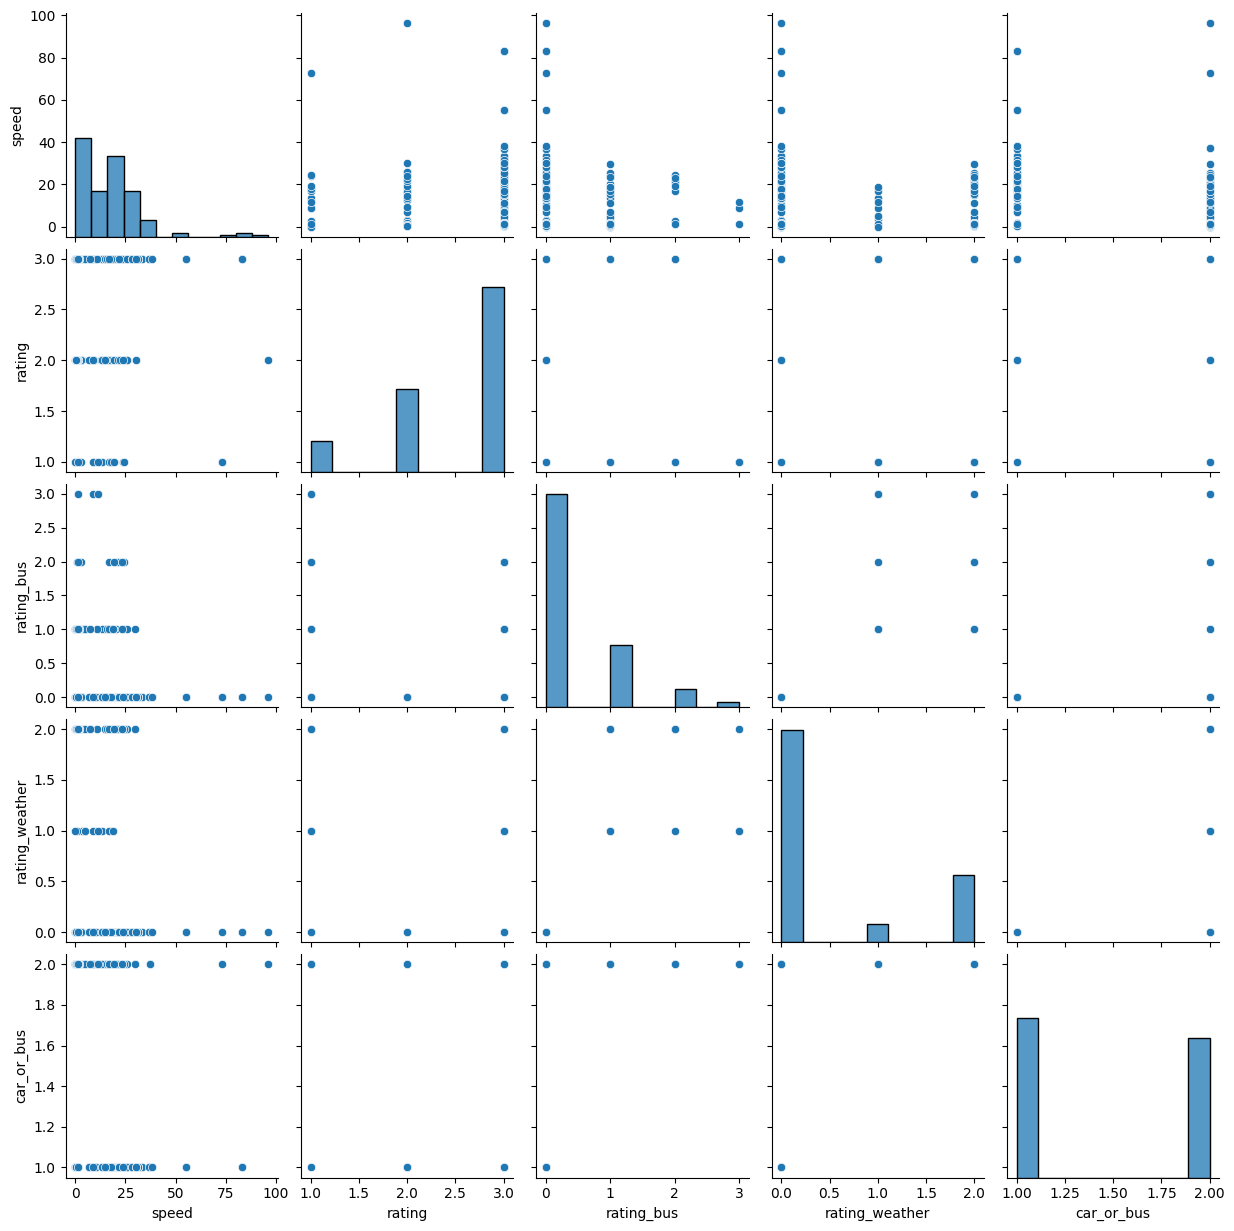

In [9]:
sns.pairplot(tracks_clean[["speed", "rating", "rating_bus", "rating_weather", "car_or_bus"]])

## Task1: 
You job is to understand and Implement the ROCK algorithm in a programming language of your choice (Python is recommended for its libraries). The implementation should be able to take a dataset and the threshold θ as inputs and output a set of clusters. You are required to run the ROCK on the provided “Geolife GPS Trajectory” datasets.


> Note: To adapt the "Geolife GPS Trajectory" dataset for the ROCK algorithm, the GPS  coordinates can be transformed into categorical data by dividing the geographical area into discrete regions or zones. Each trajectory point can then be assigned to a category based on the region it falls into. Additionally, temporal data could be categorized into hour slots, such as morning, afternoon, and evening, to add another dimension of categorization. This transformation allows the ROCK algorithm, which excels in clustering categorical data, to be applied effectively

In [10]:
## Merge the two dataframes
# merge on "id" left, "track_id" right 
# rename right time to time_point

tracks_merged = pd.merge(tracks_clean, tracks_points_clean, left_on="id", right_on="track_id")
tracks_merged = tracks_merged.drop(columns=["id_x", "id_y", "track_id"])
tracks_merged = tracks_merged.rename(columns={"time_x": "time", "time_y": "time_point"})

# Drop rows with missing values
tracks_merged = tracks_merged.dropna()

tracks_merged

,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,latitude,longitude,time_point
0,19.210586,0.138049,2.652,3,0,0,1,-10.939341,-37.062742,2014-09-13 07:24:32
1,19.210586,0.138049,2.652,3,0,0,1,-10.939341,-37.062742,2014-09-13 07:24:37
2,19.210586,0.138049,2.652,3,0,0,1,-10.939324,-37.062765,2014-09-13 07:24:42
3,19.210586,0.138049,2.652,3,0,0,1,-10.939211,-37.062843,2014-09-13 07:24:47
4,19.210586,0.138049,2.652,3,0,0,1,-10.938939,-37.062879,2014-09-13 07:24:53
...,...,...,...,...,...,...,...,...,...,...
18102,1.372998,0.016752,0.023,3,1,2,2,-10.923722,-37.106579,2016-01-19 13:01:01
18103,1.372998,0.016752,0.023,3,1,2,2,-10.923704,-37.106693,2016-01-19 13:01:12
18104,1.372998,0.016752,0.023,3,1,2,2,-10.923715,-37.106688,2016-01-19 13:01:24
18105,1.372998,0.016752,0.023,3,1,2,2,-10.923715,-37.106688,2016-01-19 13:01:36


In [11]:
# timezone: GMT-3
# time is in string format, convert to datetime
tracks_merged["time_slot"] = pd.to_datetime(tracks_merged["time_point"])

# Convert time to slots (morning, adternoon, evening)
def convert_time_to_slot(hour):
    if hour < 12:
        return 1 # "morning"
    elif hour < 18:
        return 2 # "afternoon"
    else:
        return 3 # "evening"

tracks_merged["time_slot"] = tracks_merged["time_slot"].dt.hour.apply(convert_time_to_slot)

# drop time_point, time
tracks_merged = tracks_merged.drop(columns=["time_point", "time"])

tracks_merged["time_slot"].value_counts()

time_slot
1    10059
2     5748
3     2300
Name: count, dtype: int64

In [12]:
# divide in zones

# 1. Get the min and max of lat and long
min_lat = tracks_merged["latitude"].min()
max_lat = tracks_merged["latitude"].max()
min_long = tracks_merged["longitude"].min()
max_long = tracks_merged["longitude"].max()

# 2. Divide the lat and long into 10 zones
lat_zone = np.linspace(min_lat, max_lat, 10)
long_zone = np.linspace(min_long, max_long, 10)

# 3. Create a function to assign the zone
def assign_zone(lat, long, lat_zone, long_zone):
    lat_zone = np.digitize(lat, lat_zone)
    long_zone = np.digitize(long, long_zone)
    return lat_zone, long_zone

# 4. Apply the function to the dataframe
tracks_merged["lat_zone"], tracks_merged["long_zone"] = zip(*tracks_merged.apply(lambda x: assign_zone(x["latitude"], x["longitude"], lat_zone, long_zone), axis=1))

tracks_merged["lat_zone"].value_counts(), tracks_merged["long_zone"].value_counts()

(lat_zone
 9     17988
 1       118
 10        1
 Name: count, dtype: int64,
 long_zone
 9     17987
 1       118
 10        2
 Name: count, dtype: int64)

In [13]:
## Remove Duplicate rows

print(tracks_merged.shape)

tracks_merged = tracks_merged.drop_duplicates()


tracks_merged.shape

(18107, 11)


(14431, 11)

In [14]:
# Save the cleaned data
merged_filepath = "../data/go_tracks_merged.csv"

tracks_merged.to_csv(merged_filepath, index=False)

tracks = pd.read_csv(merged_filepath)

print(tracks.shape)

tracks.head()

(14431, 11)


,speed,distance,rating,rating_bus,rating_weather,car_or_bus,latitude,longitude,time_slot,lat_zone,long_zone
0,19.210586,2.652,3,0,0,1,-10.939341,-37.062742,1,9,9
1,19.210586,2.652,3,0,0,1,-10.939341,-37.062742,1,9,9
2,19.210586,2.652,3,0,0,1,-10.939324,-37.062765,1,9,9
3,19.210586,2.652,3,0,0,1,-10.939211,-37.062843,1,9,9
4,19.210586,2.652,3,0,0,1,-10.938939,-37.062879,1,9,9


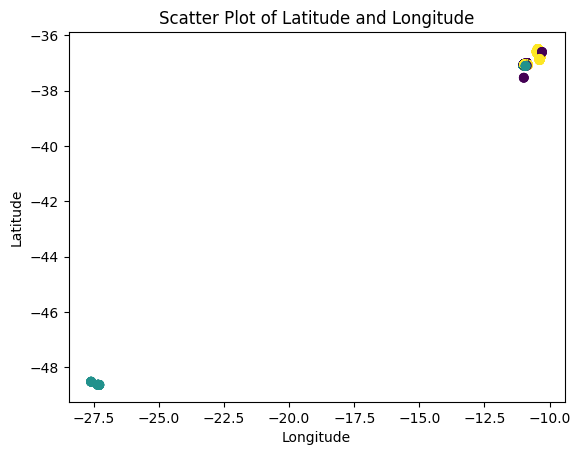

In [15]:
# plot points on a map

import matplotlib.pyplot as plt

# Scatter plot of latitude and longitude
plt.scatter(tracks["latitude"], tracks["longitude"], c=tracks["time_slot"], cmap="viridis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Latitude and Longitude")
plt.show()

In [16]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

tracks_scaled = tracks.copy()

tracks_scaled[["speed", "distance"]] = scaler.fit_transform(tracks[["speed", "distance"]])

tracks_scaled

,speed,distance,rating,rating_bus,rating_weather,car_or_bus,latitude,longitude,time_slot,lat_zone,long_zone
0,0.199600,0.047535,3,0,0,1,-10.939341,-37.062742,1,9,9
1,0.199600,0.047535,3,0,0,1,-10.939341,-37.062742,1,9,9
2,0.199600,0.047535,3,0,0,1,-10.939324,-37.062765,1,9,9
3,0.199600,0.047535,3,0,0,1,-10.939211,-37.062843,1,9,9
4,0.199600,0.047535,3,0,0,1,-10.938939,-37.062879,1,9,9
...,...,...,...,...,...,...,...,...,...,...,...
14426,0.014171,0.000394,3,1,2,2,-10.923722,-37.106579,2,9,9
14427,0.014171,0.000394,3,1,2,2,-10.923704,-37.106693,2,9,9
14428,0.014171,0.000394,3,1,2,2,-10.923715,-37.106688,2,9,9
14429,0.014171,0.000394,3,1,2,2,-10.923715,-37.106688,2,9,9


### ROCK algorithm

In [17]:
# take a sample of the data
tracks_sample = tracks_scaled.sample(2000)
# tracks_sample = tracks_scaled

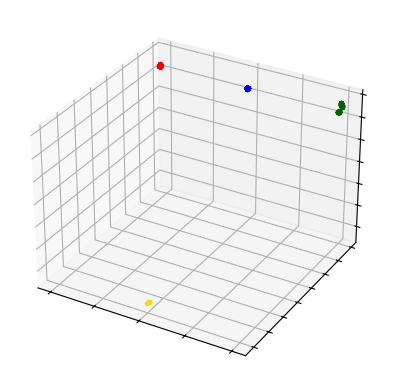

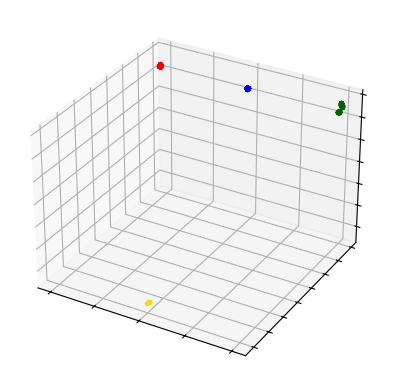

In [18]:
# rock clustering
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.rock import rock

# Load list of points for cluster analysis.
sample = tracks_sample[["time_slot", "latitude", "longitude"]].values

# Set ROCK parameters
eps = 0.5  # Maximum diameter of the neighborhood to search for the cluster
threshold = 0.9  # Threshold parameter for ROCK algorithm
number_clusters = 3  # Number of clusters to generate

# Perform clustering using ROCK algorithm
rock_instance = rock(sample, eps, number_clusters, threshold, ccore=True)
rock_instance.process()

# Obtain results of clustering
clusters = rock_instance.get_clusters()

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()